* SJSU ID - 010816832
* VIDYA COIMBATORE NAND KUMAR
* Alternus Vera Assignment

## **Influence of Sensationalism, LDA , Sentiment Analysis **

* The aim of the project is to develop a strategy to help identify fake news from real news and understand the influence of Sensationalism and other factors. 
* The subject of fake news became popular in connection with the recent US presidential elections and with possible Russian meddling into elections in the US, France, and Germany. 
* The project uses LIAR - LIAR  dataset.
* LDA, gensim and POS methods have been used for distillation



In [17]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import nltk
from nltk.tokenize import RegexpTokenizer
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from graphviz import Digraph

path_train='train.tsv'
path_test='test.tsv'
path_valid='valid.tsv'


train_data = pd.read_csv(path_train, sep='\t', header = None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [18]:
train_data.shape

(10240, 14)

In [19]:
test_data = pd.read_csv(path_test, sep='\t', header = None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [20]:
valid_data = pd.read_csv(path_valid, sep='\t', header = None)
valid_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [94]:
train_data.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000
mean,11.533210,13.286482,17.133718,16.434265,6.201407
std,18.973764,24.112936,35.846511,36.151688,16.128927
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,12.000000,13.000000,11.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


# Add Headers

In [21]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
train_data.columns = columns
train_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [22]:
test_data.columns = columns
test_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [23]:
valid_data.columns = columns
valid_data.head()

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


### Distribution of classes based on labels on Train ,test and validation data

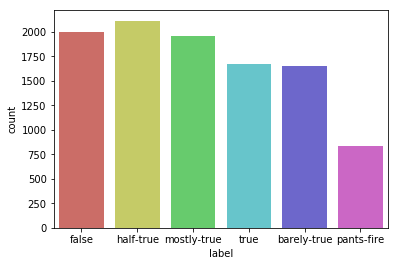

In [24]:
sb.countplot(x='label', data=train_data, palette='hls')

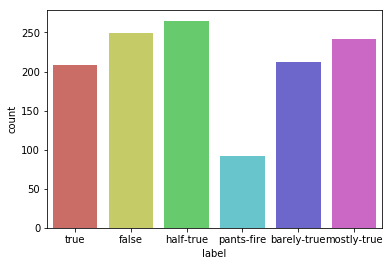

In [25]:
sb.countplot(x='label', data=test_data, palette='hls')

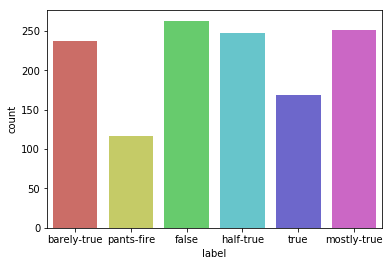

In [26]:
sb.countplot(x='label', data=valid_data, palette='hls')

# Check for missing values

In [27]:
train_data.isnull().sum()

id                         0
label                      0
statement                  0
subjects                   2
speaker                    2
speaker_job             2897
state                   2208
party                      2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64

In [28]:
train_data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
id                      10240 non-null object
label                   10240 non-null object
statement               10240 non-null object
subjects                10238 non-null object
speaker                 10238 non-null object
speaker_job             7343 non-null object
state                   8032 non-null object
party                   10238 non-null object
barely_true_counts      10238 non-null float64
false_counts            10238 non-null float64
half_true_counts        10238 non-null float64
mostly_true_counts      10238 non-null float64
pants_on_fire_counts    10238 non-null float64
context                 10138 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [29]:
test_data.isnull().sum()

id                        0
label                     0
statement                 0
subjects                  0
speaker                   0
speaker_job             325
state                   262
party                     0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  17
dtype: int64

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
id                      1267 non-null object
label                   1267 non-null object
statement               1267 non-null object
subjects                1267 non-null object
speaker                 1267 non-null object
speaker_job             942 non-null object
state                   1005 non-null object
party                   1267 non-null object
barely_true_counts      1267 non-null int64
false_counts            1267 non-null int64
half_true_counts        1267 non-null int64
mostly_true_counts      1267 non-null int64
pants_on_fire_counts    1267 non-null int64
context                 1250 non-null object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [31]:
valid_data.isnull().sum()

id                        0
label                     0
statement                 0
subjects                  0
speaker                   0
speaker_job             345
state                   279
party                     0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  12
dtype: int64

In [32]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
id                      1284 non-null object
label                   1284 non-null object
statement               1284 non-null object
subjects                1284 non-null object
speaker                 1284 non-null object
speaker_job             939 non-null object
state                   1005 non-null object
party                   1284 non-null object
barely_true_counts      1284 non-null int64
false_counts            1284 non-null int64
half_true_counts        1284 non-null int64
mostly_true_counts      1284 non-null int64
pants_on_fire_counts    1284 non-null int64
context                 1272 non-null object
dtypes: int64(5), object(9)
memory usage: 140.5+ KB


# Data pre-processing 
* Lowercase
* Tokenize
* Remove stop words and punctuation
* Remove words with fewer than 2 characters
* Stem

In [33]:
eng_stemmer = SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))


In [34]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

In [35]:
#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed

In [36]:
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

In [37]:
#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [38]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


In [39]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [40]:
process_data(train_data)

['id',
 'label',
 'statement',
 'subject',
 'speaker',
 'speaker_job',
 'state',
 'parti',
 'barely_true_count',
 'false_count',
 'half_true_count',
 'mostly_true_count',
 'pants_on_fire_count',
 'context']

In [42]:

#converting multiclass labels present in our datasets to binary class labels
train_data['label']=np.where(train_data['label']=='half-true','true',train_data['label'])
train_data['label']=np.where(train_data['label']=='mostly-true','true',train_data['label'])
train_data['label']=np.where(train_data['label']=='barely-true','false',train_data['label'])
train_data['label']=np.where(train_data['label']=='pants-fire','false',train_data['label'])
train_data['label']=np.where(train_data['label']=='TRUE','true',train_data['label'])
train_data['label']=np.where(train_data['label']=='FALSE','false',train_data['label'])
    


In [43]:
train_data.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


## Add vocabulary for sensational news

In [93]:
## Sensational words Vocabulary list:
doc_spam = 'believe	support	ISIS	absolutely	promise	society	FBI	declare	war	islam	recession	price	stock market	recession	price	lottery		terror	gunfire	nuclear	sanction	ban 	visit	signed		killed	shooting	climate change	global warming	'


corpus = []
corpus.append(doc_spam)




In [46]:
import random
import string
import re
import nltk
#nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')

## Remove punctuations, stopwords, apply Lemmatization and tokenize 

In [47]:
stop = set(stopwords.words('english') + list(string.punctuation))
stemmer = PorterStemmer()
re_punct = re.compile('[' + ''.join(string.punctuation) + ']')

In [48]:
def preprocess(text):
    try:
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if not t in stop]
        tokens = [re.sub(re_punct, '', t) for t in tokens]
        tokens = [t for t in tokens if len(t) > 2]
        tokens = [stemmer.stem(t) for t in tokens]
        if len(tokens) == 0:
            return None
        else:
            return ' '.join(tokens)
    except:
        return None

In [49]:
data_w = train_data[['statement']]
print(data_w.shape)
data_w.head()

(10240, 1)


,statement
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...


In [50]:
data_w['tokens'] = data_w['statement'].progress_map(preprocess)
data_w = data_w[data_w['tokens'].notnull()]
data_w.reset_index(inplace=True)
data_w.drop('index', inplace=True, axis=1)

progress-bar: 100%|██████████| 10240/10240 [00:05<00:00, 1942.16it/s]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
print('{} text'.format(len(data_w)))
data_w.head()

10240 text


,statement,tokens
0,Says the Annies List political group supports ...,say anni list polit group support thirdtrimest...
1,When did the decline of coal start? It started...,declin coal start start natur ga took start be...
2,"Hillary Clinton agrees with John McCain ""by vo...",hillari clinton agre john mccain vote give geo...
3,Health care reform legislation is likely to ma...,health care reform legisl like mandat free sex...
4,The economic turnaround started at the end of ...,econom turnaround start end term


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer()
X1 = vectorizer1.fit_transform(data_w.statement)

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_w.tokens)


### TF-IDF similarity matrix 

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
dist

array([[-2.22044605e-16,  1.00000000e+00,  1.00000000e+00, ...,
         9.89094077e-01,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  8.84951364e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  8.84951364e-01, -2.22044605e-16, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 9.89094077e-01,  1.00000000e+00,  1.00000000e+00, ...,
        -2.22044605e-16,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -2.22044605e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [79]:
vectorizer1.vocabulary_

{'says': 9676,
 'the': 10988,
 'annies': 1044,
 'list': 6639,
 'political': 8376,
 'group': 5115,
 'supports': 10709,
 'third': 11036,
 'trimester': 11296,
 'abortions': 615,
 'on': 7728,
 'demand': 3278,
 'when': 11934,
 'did': 3434,
 'decline': 3185,
 'of': 7672,
 'coal': 2475,
 'start': 10425,
 'it': 6052,
 'started': 10426,
 'natural': 7418,
 'gas': 4860,
 'took': 11138,
 'off': 7674,
 'that': 10980,
 'to': 11110,
 'begin': 1532,
 'in': 5687,
 'president': 8554,
 'george': 4910,
 'bushs': 1964,
 'administration': 751,
 'hillary': 5401,
 'clinton': 2444,
 'agrees': 856,
 'with': 12027,
 'john': 6133,
 'mccain': 6967,
 'by': 1989,
 'voting': 11748,
 'give': 4954,
 'bush': 1962,
 'benefit': 1569,
 'doubt': 3684,
 'iran': 5999,
 'health': 5310,
 'care': 2096,
 'reform': 9099,
 'legislation': 6502,
 'is': 6014,
 'likely': 6605,
 'mandate': 6834,
 'free': 4735,
 'sex': 9923,
 'change': 2256,
 'surgeries': 10721,
 'economic': 3842,
 'turnaround': 11351,
 'at': 1259,
 'end': 3990,
 'my': 7

In [80]:
X1.shape

(10240, 12196)

In [81]:
X.shape

(10240, 9222)

In [83]:
print(X1[8])

  (0, 10988)	0.0978591499491196
  (0, 7672)	0.06445547534660452
  (0, 6052)	0.11832705053473659
  (0, 11138)	0.16846612946161948
  (0, 11110)	0.0665660131417593
  (0, 5687)	0.062218389490167704
  (0, 4648)	0.08685325301464458
  (0, 5535)	0.29463458827124445
  (0, 123)	0.22756955973372903
  (0, 7136)	0.1304858787839454
  (0, 7786)	0.19445895849544173
  (0, 6716)	0.25580470589076476
  (0, 4801)	0.20024296552673856
  (0, 8421)	0.26730799406425393
  (0, 7494)	0.2853564210268195
  (0, 4153)	0.2781597154032699
  (0, 6389)	0.21633615984116208
  (0, 7488)	0.13390599186423865
  (0, 7529)	0.29463458827124445
  (0, 6876)	0.2781597154032699
  (0, 7751)	0.2427278636226845
  (0, 2205)	0.23037580379682684
  (0, 7939)	0.24064640200180926


In [92]:
print(X1[8].toarray().reshape(1, -1))

[[0. 0. 0. ... 0. 0. 0.]]


In [59]:
from scipy import spatial

In [123]:
cos_doc1 = 1 - spatial.distance.cosine(X[0].toarray(), X[138].toarray())
cos_doc1

0.04132463033830269

### Latent Dirichlet Allocation

In [111]:
from gensim import corpora, models, similarities
from time import time
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [115]:
def tokenize_and_stem(text):
    # first tokenize by sentence
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [116]:

import string
def strip_proppers(text):
    # first tokenize by sentence, then by word 
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [117]:

#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [ ]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in train_data['statement']]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

In [ ]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
t0=time()

In [101]:
data_w['tokens']

0        say anni list polit group support thirdtrimest...
1        declin coal start start natur ga took start be...
2        hillari clinton agre john mccain vote give geo...
3        health care reform legisl like mandat free sex...
4                         econom turnaround start end term
5        chicago bear start quarterback last year total...
6                     jim dunnam live district repres year
7        person stage work activ last year pass along r...
8        howev took 195 million oregon lotteri fund por...
9        say gop primari oppon glenn grothman joe leibh...
10       first time histori share nation popular vote m...
11       sinc 2000 nearli million american slip middl c...
12       mitt romney governor massachusett didnt slow r...
13                economi bled billion due govern shutdown
14       afford care act alreadi sens waiv otherwis sus...
15       last elect novemb percent american peopl chose...
16       mccain oppos requir govern buy americanmad mot.

In [ ]:
dictionary = corpora.Dictionary(data_w['tokens'])

In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

## Calculate Sentiment Analysis of statements

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
 
lemmatizer = WordNetLemmatizer()
 
def penn_to_wn(tag):
    
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def clean_text(text):
    text = text.replace("<br />", " ")
    text = text.decode("utf-8")
 
    return text

def swn_polarity(text):
    """
    Return a sentiment polarity: 0 = negative, 1 = positive
    """
 
    sentiment = 0.0
    tokens_count = 0
 
    text = clean_text(text)
 
 
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
 
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
 
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
 
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
 
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
 
    # judgment call ? Default to positive or negative
    if not tokens_count:
        return 0
 
    # sum greater than 0 => positive sentiment
    if sentiment >= 0:
        return 1
 
    # negative sentiment
    return 0

# Since we're shuffling, you'll get diffrent results
print(swn_polarity(train_X[0]), train_y[0]) # 1 1
print (swn_polarity(train_X[1]), train_y[1]) # 0 0
print (swn_polarity(train_X[2]), train_y[2]) # 0 1
print (swn_polarity(train_X[3]), train_y[3]) # 1 1
print (swn_polarity(train_X[4]), train_y[4]) # 1 1`

## Next steps
* Complete Sentiment Analysis
* Complete political affilation
* Analyse and assign weights for each factor